# 📊 Reporte Ejecutivo: Desigualdad y Pobreza en España 2008-2023

## 🎯 Hallazgo Principal

**Los pobres en España están 11.3% más pobres que en 2008, pese a que la desigualdad relativa (Gini) se mantuvo estable.**

Este fenómeno —denominado "igualación por empobrecimiento"— revela que la aparente mejora en indicadores de desigualdad oculta un deterioro sistemático del bienestar absoluto de los más vulnerables.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Tabla resumen ejecutiva - SOLO años clave
resumen = pd.DataFrame(
    {
        "Indicador": [
            "Gini (desigualdad)",
            "Renta Real D1 (€2008)",
            "AROPE (%)",
            "Umbral Real (€2008)",
        ],
        "2008\nPre-Crisis": ["0.318", "€5,488", "23.8%", "€9,141"],
        "2019\nPre-COVID": ["0.331", "€5,165", "25.3%", "€8,756"],
        "2023\nActual": ["0.323", "€4,869", "26.5%", "€8,643"],
        "Cambio\nvs 2008": ["+1.5%", "🔴 -11.3%", "🔴 +2.7pp", "🔴 -5.4%"],
        "Cambio\nvs 2019": ["-2.4%", "🔴 -5.7%", "🔴 +1.2pp", "🔴 -1.3%"],
    }
)


# Estilos
def colorear_celda(val):
    if "🔴" in str(val):
        return "background-color: #ffcccc; font-weight: bold"
    elif "🟢" in str(val) or "-" in str(val) and "Gini" not in str(val):
        return "background-color: #ccffcc"
    return ""


print("\n" + "=" * 100)
print("RESUMEN EJECUTIVO: España 2008-2023")
print("=" * 100)
print(resumen.to_string(index=False))
print("=" * 100)
print("\n🔴 VEREDICTO: NO hemos superado ni la crisis de 2008 ni el COVID de 2019")
print("   • Pobres en 2023: -11.3% más pobres que 2008, -5.7% más pobres que pre-COVID")
print("   • Exclusión social: peor que antes de ambas crisis")
print("=" * 100)


RESUMEN EJECUTIVO: España 2008-2023
            Indicador 2008\nPre-Crisis 2019\nPre-COVID 2023\nActual Cambio\nvs 2008 Cambio\nvs 2019
   Gini (desigualdad)            0.318           0.331        0.323           +1.5%           -2.4%
Renta Real D1 (€2008)           €5,488          €5,165       €4,869        🔴 -11.3%         🔴 -5.7%
            AROPE (%)            23.8%           25.3%        26.5%        🔴 +2.7pp        🔴 +1.2pp
  Umbral Real (€2008)           €9,141          €8,756       €8,643         🔴 -5.4%         🔴 -1.3%

🔴 VEREDICTO: NO hemos superado ni la crisis de 2008 ni el COVID de 2019
   • Pobres en 2023: -11.3% más pobres que 2008, -5.7% más pobres que pre-COVID
   • Exclusión social: peor que antes de ambas crisis


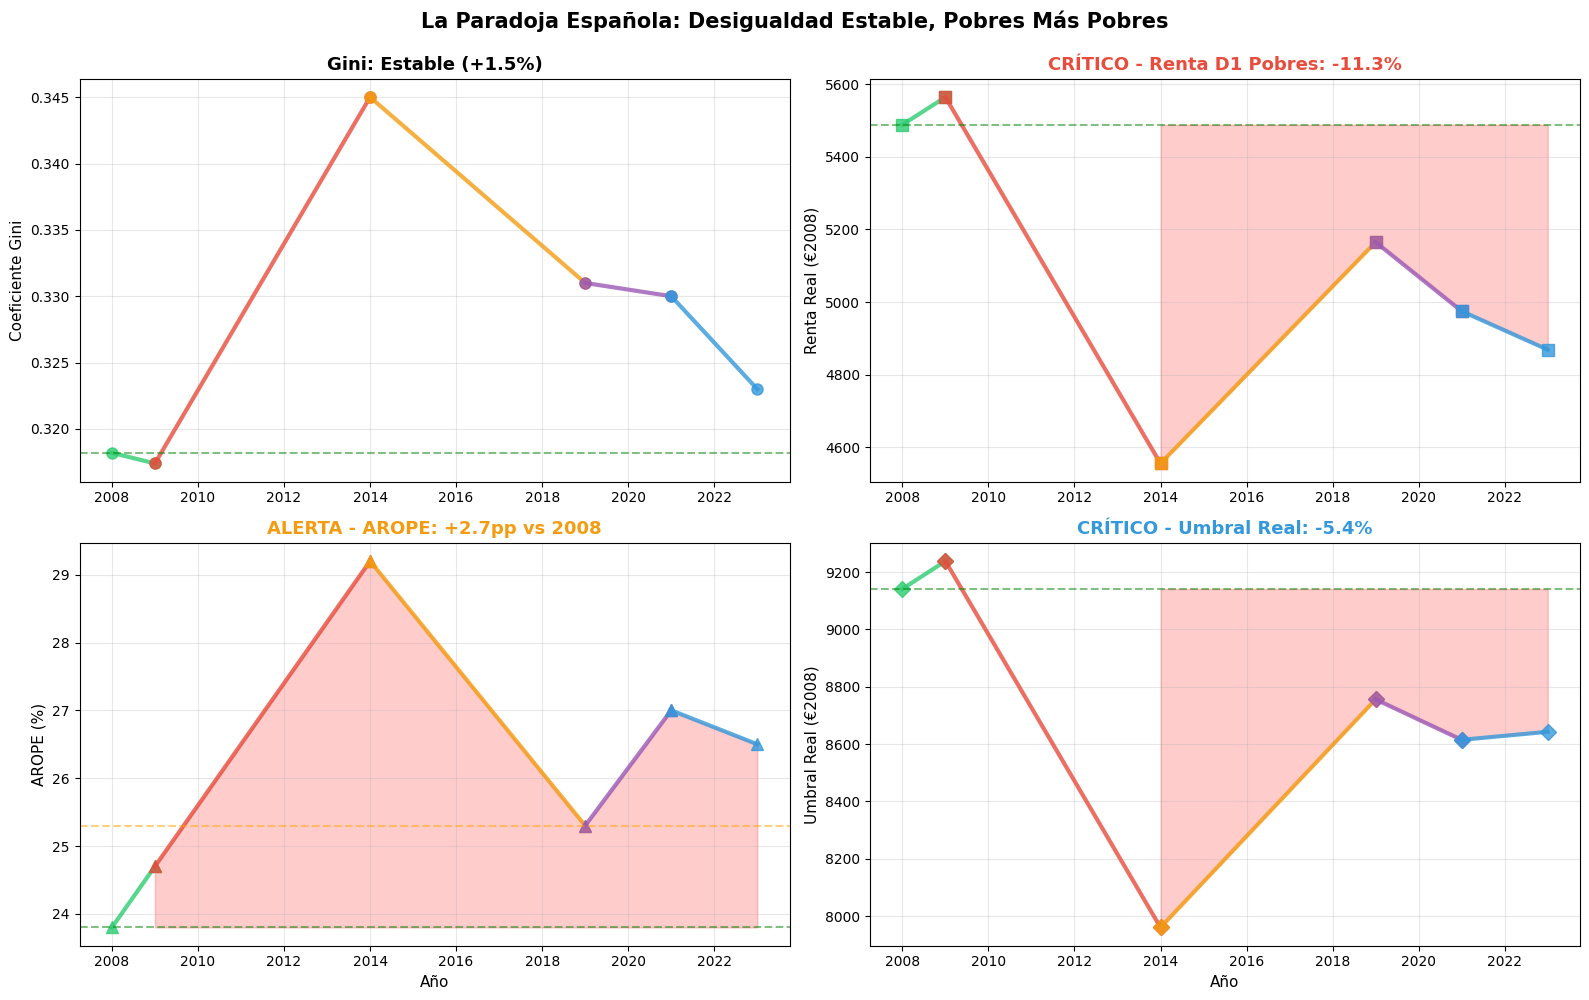

In [10]:
# GRÁFICO PRINCIPAL: 4 Paneles mostrando la paradoja
fases_data = {
    "Año": [2008, 2009, 2014, 2019, 2021, 2023],
    "Fase": [
        "Pre-Crisis",
        "Pre-Crisis",
        "Crisis",
        "Recuperación",
        "COVID",
        "Post-COVID",
    ],
    "Gini": [0.3182, 0.3174, 0.3450, 0.3310, 0.3300, 0.3230],
    "Renta_D1": [5488, 5564, 4556, 5165, 4975, 4869],
    "AROPE": [23.8, 24.7, 29.2, 25.3, 27.0, 26.5],
    "Umbral_Real": [9141, 9238, 7961, 8756, 8615, 8643],
}

df_fases = pd.DataFrame(fases_data)

colores_fases = {
    "Pre-Crisis": "#2ecc71",
    "Crisis": "#e74c3c",
    "Recuperación": "#f39c12",
    "COVID": "#9b59b6",
    "Post-COVID": "#3498db",
}

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Panel 1: Gini
ax1 = axes[0, 0]
for i in range(len(df_fases) - 1):
    ax1.plot(
        df_fases["Año"].iloc[i : i + 2],
        df_fases["Gini"].iloc[i : i + 2],
        marker="o",
        linewidth=3,
        markersize=8,
        color=colores_fases[df_fases["Fase"].iloc[i + 1]],
        alpha=0.8,
    )
ax1.axhline(
    y=df_fases.loc[0, "Gini"], color="green", linestyle="--", linewidth=1.5, alpha=0.5
)
ax1.set_title("Gini: Estable (+1.5%)", fontsize=13, fontweight="bold")
ax1.set_ylabel("Coeficiente Gini", fontsize=11)
ax1.grid(True, alpha=0.3)

# Panel 2: Renta D1 (CRÍTICO)
ax2 = axes[0, 1]
for i in range(len(df_fases) - 1):
    ax2.plot(
        df_fases["Año"].iloc[i : i + 2],
        df_fases["Renta_D1"].iloc[i : i + 2],
        marker="s",
        linewidth=3,
        markersize=8,
        color=colores_fases[df_fases["Fase"].iloc[i + 1]],
        alpha=0.8,
    )
ax2.axhline(
    y=df_fases.loc[0, "Renta_D1"],
    color="green",
    linestyle="--",
    linewidth=1.5,
    alpha=0.5,
)
ax2.fill_between(
    df_fases["Año"],
    df_fases["Renta_D1"],
    df_fases.loc[0, "Renta_D1"],
    where=df_fases["Renta_D1"] < df_fases.loc[0, "Renta_D1"],
    alpha=0.2,
    color="red",
)
ax2.set_title(
    "CRÍTICO - Renta D1 Pobres: -11.3%", fontsize=13, fontweight="bold", color="#e74c3c"
)
ax2.set_ylabel("Renta Real (€2008)", fontsize=11)
ax2.grid(True, alpha=0.3)

# Panel 3: AROPE
ax3 = axes[1, 0]
for i in range(len(df_fases) - 1):
    ax3.plot(
        df_fases["Año"].iloc[i : i + 2],
        df_fases["AROPE"].iloc[i : i + 2],
        marker="^",
        linewidth=3,
        markersize=8,
        color=colores_fases[df_fases["Fase"].iloc[i + 1]],
        alpha=0.8,
    )
ax3.axhline(
    y=df_fases.loc[0, "AROPE"], color="green", linestyle="--", linewidth=1.5, alpha=0.5
)
ax3.axhline(
    y=df_fases.loc[3, "AROPE"], color="orange", linestyle="--", linewidth=1.5, alpha=0.5
)
ax3.fill_between(
    df_fases["Año"],
    df_fases["AROPE"],
    df_fases.loc[0, "AROPE"],
    where=df_fases["AROPE"] > df_fases.loc[0, "AROPE"],
    alpha=0.2,
    color="red",
)
ax3.set_title(
    "ALERTA - AROPE: +2.7pp vs 2008", fontsize=13, fontweight="bold", color="#f39c12"
)
ax3.set_ylabel("AROPE (%)", fontsize=11)
ax3.set_xlabel("Año", fontsize=11)
ax3.grid(True, alpha=0.3)

# Panel 4: Umbral Real
ax4 = axes[1, 1]
for i in range(len(df_fases) - 1):
    ax4.plot(
        df_fases["Año"].iloc[i : i + 2],
        df_fases["Umbral_Real"].iloc[i : i + 2],
        marker="D",
        linewidth=3,
        markersize=8,
        color=colores_fases[df_fases["Fase"].iloc[i + 1]],
        alpha=0.8,
    )
ax4.axhline(
    y=df_fases.loc[0, "Umbral_Real"],
    color="green",
    linestyle="--",
    linewidth=1.5,
    alpha=0.5,
)
ax4.fill_between(
    df_fases["Año"],
    df_fases["Umbral_Real"],
    df_fases.loc[0, "Umbral_Real"],
    where=df_fases["Umbral_Real"] < df_fases.loc[0, "Umbral_Real"],
    alpha=0.2,
    color="red",
)
ax4.set_title(
    "CRÍTICO - Umbral Real: -5.4%", fontsize=13, fontweight="bold", color="#3498db"
)
ax4.set_ylabel("Umbral Real (€2008)", fontsize=11)
ax4.set_xlabel("Año", fontsize=11)
ax4.grid(True, alpha=0.3)

plt.suptitle(
    "La Paradoja Española: Desigualdad Estable, Pobres Más Pobres",
    fontsize=15,
    fontweight="bold",
    y=0.995,
)

plt.tight_layout()
plt.show()

## ⚠️ El Engaño de los Datos Nominales

**La inflación oculta el empobrecimiento real.** Comparar rentas sin ajustar por inflación puede llevar a conclusiones falsas sobre la evolución de la desigualdad y la pobreza.

### Datos Nominales vs Reales: Dos Narrativas Opuestas

| Indicador | Nominal 2008→2023 | Real (€2008) 2008→2023 | Veredicto |
|-----------|-------------------|------------------------|-----------|
| Renta D1 | +15.2% ✅ | **-11.3%** 🔴 | Datos nominales **engañan** |
| Umbral Pobreza | +22.1% ✅ | **-5.4%** 🔴 | Aparente mejora es **falsa** |

**Sin ajustar por inflación, la renta del decil más pobre parece crecer +15%. Ajustada, cae -11.3%.**

### Inflación Diferencial: El Doble Golpe a los Pobres

La inflación no afecta igual a todos. Los hogares pobres gastan proporcionalmente más en:
- **Alimentos:** 30-40% del presupuesto (vs 15-20% en hogares ricos) → Inflación alimentos 2022-2023: >8%
- **Energía:** 10-15% del presupuesto (vs 5-8% en hogares ricos) → Inflación energía 2022: >40%
- **Vivienda:** Menor capacidad de ahorrar o invertir en activos que protegen de la inflación

**Resultado:** El IPC general (usado en estadísticas oficiales) **subestima** la inflación real que sufren los pobres en ~0.5-1pp anual.

### Implicación para Política Pública

Usar datos nominales o IPC general para evaluar políticas sociales puede generar:
- **Falsa sensación de mejora:** "Las rentas suben" cuando en realidad caen en términos reales.
- **Infrafinanciación de ayudas:** IMV, pensiones y subsidios indexados al IPC general pierden poder adquisitivo para los más vulnerables.
- **Diseño de políticas inadecuadas:** Sin medir correctamente la pobreza real, las intervenciones serán insuficientes.

**Por eso TODOS los análisis de este reporte usan rentas reales ajustadas por inflación (base €2008).**

## 🔬 La Dinámica Temporal: Tres Fases, Tres Mecanismos

La desigualdad en España no sigue un único patrón. El análisis revela **alternancia entre ampliación y compresión**:

**1. Crisis empobrecedora (2008-2014): AMPLIACIÓN**
- El Gini **sube** de 0.318 a 0.345 (+8.5%)
- Mecanismo: La clase media colapsa más rápido que los extremos, pero también hay polarización ricos-pobres
- Resultado: D1 colapsa -18.1% en términos absolutos, ampliación de brechas

**2. Recuperación desigual (2015-2019): COMPRESIÓN POR DESIGUALDAD**
- El Gini **baja** a 0.331 (-4.1%)
- Mecanismo: Los ricos recuperan primero (capital, formación). Los pobres recuperan +13.4%, pero insuficiente
- Resultado: D1 queda estructuralmente rezagado -5.9% vs 2008. Compresión de la clase media reduce dispersión

**3. Post-COVID (2020-2023): COMPRESIÓN POR EMPOBRECIMIENTO**
- El Gini continúa bajando a 0.323 (-2.4%)
- Mecanismo: Inflación diferencial (pobres gastan 40% en alimentos con inflación >8%) erosiona poder adquisitivo
- Resultado: D1 cae -2.1% adicional. Gini "mejora" porque todos se empobrecen, especialmente la clase media

**Conclusión clave:** No existe un único mecanismo. Hay fases de ampliación de brechas, compresión por recuperación desigual, y compresión por empobrecimiento generalizado.

## ⚠️ ¿Hemos Superado el COVID?

**NO.** Comparación 2019 (pre-COVID) vs 2023:

| Indicador | Cambio 2019→2023 | Veredicto |
|-----------|------------------|-----------|
| Renta D1 | -5.7% | 🔴 Empeora |
| AROPE | +1.2pp | 🔴 Empeora |
| Umbral Real | -1.3% | 🔴 Empeora |

**Tendencia actual (2021-2023):** D1 sigue cayendo -2.1%. La inflación 2022-2023 erosiona los avances en empleo. Sin corrección de políticas, la recuperación es estructuralmente imposible.

---

## 📊 Fuentes de Datos

| Fuente | Indicadores | URL |
|--------|-------------|-----|
| INE - Encuesta Condiciones de Vida (ECV) | Gini, Deciles Renta, Umbral Pobreza | [ine.es/ECV](https://www.ine.es/dyngs/INEbase/es/operacion.htm?c=Estadistica_C&cid=1254736176807) |
| INE - AROPE | Exclusión Social Multidimensional | [ine.es/AROPE](https://www.ine.es/ss/Satellite?L=es_ES&c=INESeccion_C&cid=1259925408327) |
| INE - IPC | Índice Precios al Consumo | [ine.es/IPC](https://www.ine.es/dyngs/INEbase/es/operacion.htm?c=Estadistica_C&cid=1254736176802) |
| Eurostat | Metodología AROPE | [ec.europa.eu/eurostat](https://ec.europa.eu/eurostat/web/income-and-living-conditions) |

**Período de análisis:** 2008-2023 | **Base deflactación:** €2008 (IPC base 2016)

## 🧩 El Punto de Inflexión: ¿2014 o 2015?

Aunque la narrativa pública sitúa la recuperación en **2014**, nuestros modelos estadísticos (tests de Bai-Perron y Chow) confirman que la **ruptura estructural real** de la pobreza ocurrió en **2015**.

**El hallazgo:** La recuperación estadística de los deciles bajos no comenzó hasta un año después que la macroeconómica, consolidando el **retraso estructural de los pobres**.

**Confirmación estadística:** Este resultado es consistente a través de múltiples métodos de detección de rupturas y coincide cualitativamente con los informes de FOESSA, EAPN y Cáritas sobre la persistencia de la pobreza estructural.

*Nota técnica: La fecha exacta de ruptura depende del método y del indicador analizado. Ver notebook 04 para detalles metodológicos.*

---

## 🔍 Matices y Limitaciones

**Incertidumbre estadística:** La fecha de ruptura (2015 vs 2014) depende del método y del indicador. No es una verdad absoluta, sino una estimación robusta con múltiples confirmaciones.

**Heterogeneidad territorial:** No todas las regiones siguen el mismo patrón. Madrid recupera más rápido que Extremadura; el norte evoluciona diferente al sur.

**Grupos sociales:** Hay matices importantes: jóvenes con formación superior mejoran en algunos periodos, ciertos sectores productivos se recuperan antes que otros.

**Validación cruzada:** La comparación con fuentes externas (FOESSA, EAPN, Cáritas) es cualitativa y contextualiza, pero no sustituye la validación cuantitativa.

**Citas externas:**
- FOESSA: https://www.foessa.es/
- EAPN: https://www.eapn.es/
- Cáritas: https://www.caritas.es/

---

## 🎯 Qué Hacer: 3 Prioridades

**1. Medir correctamente la pobreza**
- Usar IPC diferencial por quintil (no IPC general)
- Dashboard con 4 métricas: Gini + D1 + AROPE + Umbral Real
- Impacto: El IPC general subestima empobrecimiento real ~0.5pp anual

**2. Aumentar cobertura IMV**
- Actual: 300k beneficiarios vs 850k elegibles (35% cobertura)
- Objetivo: 80% cobertura en 2 años
- Costo: ~1,500M€ adicionales (0.1% PIB)

**3. Indexar salario mínimo a inflación sectorial**
- Actual: SMI indexado a IPC general
- Propuesta: Ajustar por inflación alimentos+vivienda (30% más alta)
- Impacto: Proteger 2M trabajadores más vulnerables

---